In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import time

%matplotlib inline

# 2D-DFT
## Question 1
### Iterative implementation

In [2]:
def dft_1(I):
    (M, N) = I.shape
    W_M = np.exp(-1*1j*2*np.pi/M)
    W_N = np.exp(-1*1j*2*np.pi/N)
    It = np.zeros((M, N))
    
    for u in range(M):
        for v in range(N):
            for i in range(M):
                for j in range(N):
                    It[u, v] = I[i, j]*np.power(W_M, i)*np.power(W_N, j)
    
    return It

def idft_1(It):
    (M, N) = It.shape
    W_M = np.exp(-1*1j*2*np.pi/M)
    W_N = np.exp(-1*1j*2*np.pi/N)
    I = np.zeros((M, N))
    
    for u in range(M):
        for v in range(N):
            for i in range(M):
                for j in range(N):
                    I[u, v] = It[i, j]*np.power(W_M, -1*i)*np.power(W_N, -1*j)
    
    return (1/(M*N))*I

def plot_DFT(It, log=True):
    mag = np.absolute(It)
    phase = np.angle(It)
    
    plt.figure()
    
    plt.subplot(1, 2, 1)
    plt.title("Magnitude")
    if log:
        plt.imshow(np.log(1 + mag), cmap='gray')
    else:
        plt.imshow(mag, cmap='gray')
    
    plt.subplot(1, 2, 2)
    plt.title("Phase")
    plt.imshow(phase, cmap='gray')

In [3]:
import cv2

img = cv2.imread("clock.tiff", cv2.IMREAD_GRAYSCALE)

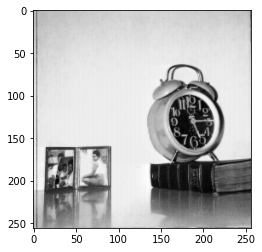

In [4]:
plt.imshow(img, cmap='gray')

In [5]:
I_dft = dft_1(img)
plot_DFT(I_dft)

<ipython-input-2-803c538f9da1>:11: ComplexWarning: Casting complex values to real discards the imaginary part
  It[u, v] = I[i, j]*np.power(W_M, i)*np.power(W_N, j)


KeyboardInterrupt: 

### Matrix implementation

In [6]:
def dft_matrix(N):
    i, j = np.meshgrid(np.arange(N), np.arange(N))
    omega = np.exp( - 2 * np.pi * 1j / N )
    W = np.power( omega, i * j )
    return W

def idft_matrix(N):
    i, j = np.meshgrid(np.arange(N), np.arange(N))
    omega = np.exp(2 * np.pi * 1j / N )
    W = np.power( omega, i * j ) / N
    return W

def dft_2(I):
    (M, N) = I.shape
    
    W_N = dft_matrix(N)
    W_M = dft_matrix(M)
    
    It = np.zeros((M, N), dtype=np.complex)
    It = W_M@I@W_N
    return It

def idft_2(It):
    (M, N) = It.shape
    W_N = idft_matrix(N)
    W_M = idft_matrix(M)
    
    I = np.zeros((M, N), dtype=int)
    I = np.clip(np.real(W_M@It@W_N), 0, 255)
    return I

### DFT on image

<ipython-input-6-03a80f954242>:19: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  It = np.zeros((M, N), dtype=np.complex)


CPU times: user 411 ms, sys: 247 ms, total: 658 ms
Wall time: 142 ms


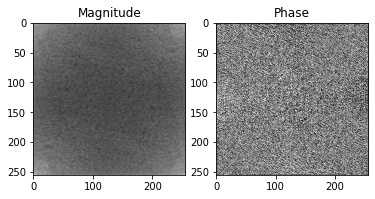

In [7]:
%%time
I_dft = dft_2(img)
plot_DFT(I_dft)

CPU times: user 268 ms, sys: 158 ms, total: 425 ms
Wall time: 102 ms


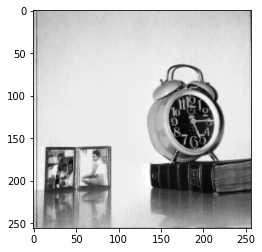

In [8]:
%%time
I = idft_2(I_dft)
plt.imshow(I, cmap='gray')

### Centered DFT

In [9]:
def centered_dft(I):
    (M, N) = I.shape
    i, j = np.meshgrid(np.arange(M), np.arange(N))
    scale_mat = np.power(-1, i + j)
    
    return dft_2(scale_mat*I)

<ipython-input-6-03a80f954242>:19: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  It = np.zeros((M, N), dtype=np.complex)


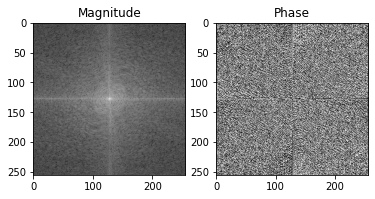

In [10]:
c_I_dft = centered_dft(img)
plot_DFT(c_I_dft)

### IDFT[DFT[I]] = I

In [11]:
I = idft_2(dft_2(img))

<ipython-input-6-03a80f954242>:19: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  It = np.zeros((M, N), dtype=np.complex)


In [12]:
if np.allclose(I, img):
    print("IDFT[DFT[I]] == I is verified!!")
else:
    print("IDFT[DFT[I]] == I is not verified!!")

IDFT[DFT[I]] == I is verified!!


### Importance of Phase
#### (a) Setting the phase to 0

In [13]:
I_dft_ph_zero = np.real(I_dft)
I_ph_zero = idft_2(I_dft_ph_zero)

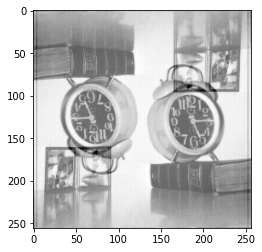

In [14]:
plt.imshow(I_ph_zero, cmap='gray')

#### (b) Adding noise

In [15]:
I_dft_mag = np.absolute(I_dft)
I_dft_phase = np.angle(I_dft)
I_dft_phase_noise = np.random.normal(size=I.shape) + I_dft_phase

I_phase_noise = idft_2(I_dft_mag * np.exp(1j * I_dft_phase_noise)) 

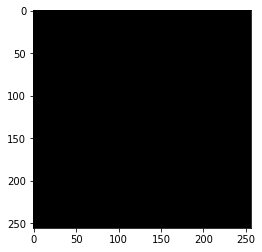

In [16]:
plt.imshow(I_phase_noise, cmap='gray')

# Periodic Convolution

In [17]:
def circular_convolve(f, h):
    (M, N) = f.shape
    (m, n) = h.shape
    
    fr = np.flip(f)
    F = np.vstack((np.hstack((fr, fr)), np.hstack((fr, fr))))
#     plt.figure()
#     plt.imshow(F, cmap='gray')
#     plt.figure()
#     plt.imshow(h, cmap='gray')
    J = np.zeros((M, N))
    for i in range(M):
        for j in range(N):
            J[i, j] = np.sum(F[(M - 1 - i):(m + M - i-1), (N - 1 - j):(n + N - j-1)]*h)
    return J

In [21]:
%%time
average_filter = (1/25)*np.ones((5, 5))
I_avg_cconvolve = circular_convolve(img, average_filter)

CPU times: user 452 ms, sys: 208 µs, total: 452 ms
Wall time: 450 ms


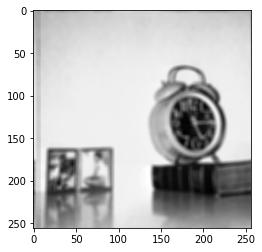

In [23]:
plt.imshow(I_avg_cconvolve, cmap='gray')

### Linear convolution with circular convolution

In [24]:
def linear_convolve(f, h):
    (M, N) = f.shape
    (m, n) = h.shape
    
    h_padded = np.vstack((np.hstack((h, np.zeros((m, 2*N - n)))), np.zeros((2*M-m, 2*N))))
    f_padded = np.vstack((np.hstack((f, np.zeros((M, N)))), np.zeros((M, 2*N))))
    return circular_convolve(f_padded, h_padded)[:M, :N]

In [ ]:
%%time
I_avg_lconvolve = linear_convolve(img, average_filter)

In [ ]:
plt.imshow(I_avg_lconvolve, cmap='gray')